In [59]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import coop_setup_funcs as csf
import healpy as hp
from astropy.io import fits

In [22]:
halfpi, pi, twopi = [f*np.pi for f in [0.5, 1, 2]]

degs, rads = 180/pi, pi/180

# do radians first, then convert later

nstars = int(30000/.01)
print(nstars)

ran1, ran2 = np.random.random(2*nstars).reshape(2, -1)

RA  = twopi * (ran1 - 0.5)
dec = np.arcsin(2.*(ran2-0.5))
RAdeg = degs* RA
decdeg = degs*dec

RAdeg[RAdeg<0] += 360

3000000


In [23]:
theta,phi = csf.DeclRatoThetaPhi(decdeg,RAdeg)

In [29]:
min(phi)

6.698764800531439e-08

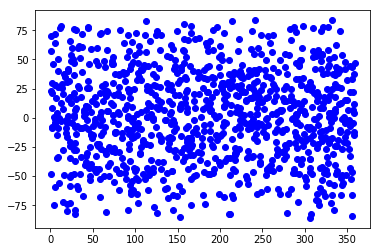

In [28]:
plt.plot(np.random.choice(RAdeg,1000,replace=False),np.random.choice(decdeg,1000,replace=False), 'bo')

In [31]:
tp = np.zeros((len(theta), 2))
tp[:,0] = theta
tp[:,1] = phi


In [41]:
import healpy as hp
mask = hp.read_map("/mnt/raid-cita/mlokken/data/act_ymaps/tilec_mask_4096_hpx.fits")

/home/mlokken/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


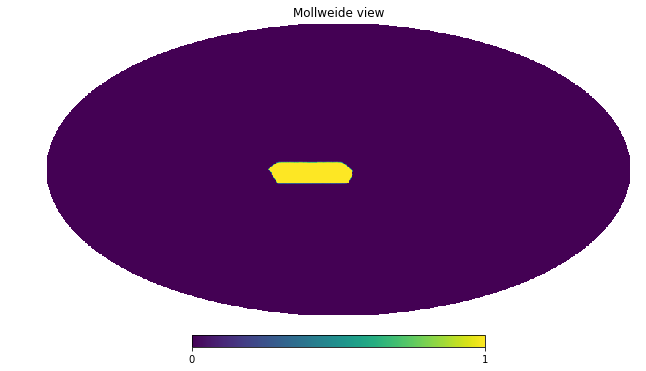

In [42]:
hp.mollview(mask)

In [44]:
fullsky_pix = hp.ang2pix(theta=theta,phi=phi, nside=4096)

In [50]:
thetaphi_inreg = tp[mask[fullsky_pix] == 1]

In [57]:
np.amin(thetaphi_inreg[:,0])

1.5142811259395155

In [58]:
np.savetxt("/home/mlokken/oriented_stacking/random_sky_points_3E6.txt", thetaphi_inreg)

In [63]:
rand = fits.open("../random_stack_acty.fits")
rand.info()
yrand = rand[0].data
rand.close()

Filename: ../random_stack_acty.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   (481, 481)   float64   


FORMAT  =HEALPIX                                                                 [astropy.io.fits.card]
MAP     =/mnt/raid-cita/mlokken/data/act_ymaps/tilec_single_tile_deep56_comptony [astropy.io.fits.card]
FWHM_IN =1.6                                                                     [astropy.io.fits.card]
FWHM_PRE=0.                                                                      [astropy.io.fits.card]
PEAKS   =random_locs_ACTxDES_area_pks.fits                                       [astropy.io.fits.card]
MASK    =/mnt/raid-cita/mlokken/data/act_ymaps/tilec_mask_4096_hpx.fits          [astropy.io.fits.card]
FIELD   =I                                                                       [astropy.io.fits.card]
RADIUS  =2                                                                       [astropy.io.fits.card]
RES     =240                                                                     [astropy.io.fits.card]
COLORTAB=jet                                                    

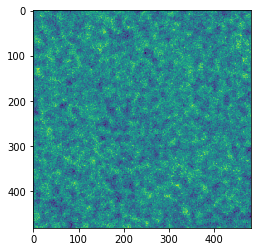

In [64]:
plt.imshow(yrand)

In [65]:
np.average(yrand)

1.3550061886491848e-07